# Peloton API

See also https://github.com/justmedude/pylotoncycle/tree/main/pylotoncycle

This requires a Peloton login and you will then be limited to public profiles.

In [1]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt

from dotenv import load_dotenv
load_dotenv()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


True

In [2]:
# Log in to obtain an access token
login_url = 'https://api.onepeloton.com/auth/login'
login_data = {'username_or_email': os.environ.get("ptonUsername"),
              'password': os.environ.get("ptonPw")}
#response = requests.post(login_url, json=login_data)
#login = response.json()
#user_id = login['user_id']

In [3]:
s = requests.Session()
login_response = s.post(login_url, json=login_data)

# workout_id = '555'
# Fetch workout details using the access token and workout ID
# workout_url = f'https://api.onepeloton.com/api/workout/{workout_id}/performance_graph?every_n=5'
# response = s.get(workout_url) 
# workout_data = response.json()

user_id = login_response.json()['user_id']
followers = s.get(f'https://api.onepeloton.com/api/user/{user_id}/followers')
f = followers.json()

In [4]:
df = pd.DataFrame()

for i in f['data']:
    idx = len(df)
    df.loc[idx, 'total_workouts'] = i['total_workouts']
    df.loc[idx, 'total_followers'] = i['total_followers']

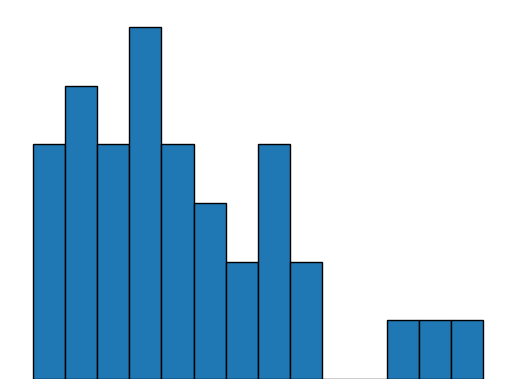

In [5]:
df.total_workouts.hist(bins = 14, ec = 'black')
plt.axis('off')
plt.show()

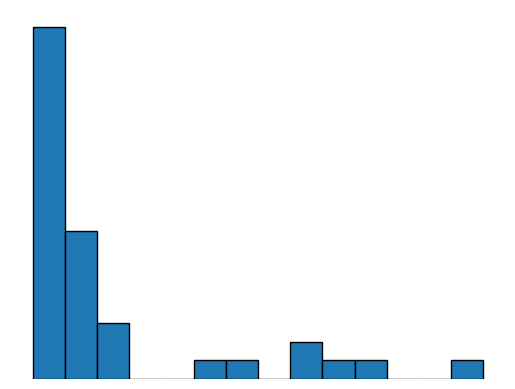

In [6]:
df.total_followers.hist(bins = 14, ec = 'black')
plt.axis('off')
plt.show()